In [ ]:
from IPython.display import clear_output
clear_output()

In [ ]:
# import libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# function to split train set into two, train and valid set
from sklearn.model_selection import train_test_split

In [ ]:
# load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print(y_train)

[5 0 4 ... 5 6 8]


In [ ]:
def describe_data(data_variable):
    print(f"[{data_variable}] min: {globals()[data_variable].min()}, max: {globals()[data_variable].max()}, dtype: {globals()[data_variable].dtype}, shape: {globals()[data_variable].shape}")

In [ ]:
# "structure" of training and testing data (data are numpy arrays)
describe_data('x_train')
describe_data('x_test')

[x_train] min: 0, max: 255, dtype: uint8, shape: (60000, 28, 28)
[x_test] min: 0, max: 255, dtype: uint8, shape: (10000, 28, 28)


In [ ]:
# want to reshape images into RGB format, i.e. 28x28x1

x_train_test = x_train
x_test_test = x_test

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

describe_data('x_train')
describe_data('x_test')

[x_train] min: 0, max: 255, dtype: uint8, shape: (60000, 28, 28, 1)
[x_test] min: 0, max: 255, dtype: uint8, shape: (10000, 28, 28, 1)


In [ ]:
# TODO

# values are in the range of 0 and 255, we want them to be between 0 and 1 (and have it in float32 format)
# hint: .astype(np.float32)

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.astype(np.float32)
# x_train = (x_train - np.mean(x_train)) / np.std(x_train)
x_test = x_test.astype(np.float32)
# x_test = (x_test - np.mean(x_test)) / np.std(x_test)

describe_data('x_train')
describe_data('x_test')

[x_train] min: 0.0, max: 1.0, dtype: float32, shape: (60000, 28, 28, 1)
[x_test] min: 0.0, max: 1.0, dtype: float32, shape: (10000, 28, 28, 1)


In [ ]:
# ! note the max value is 1 and dtype is float32

describe_data('x_train')
describe_data('x_test')

[x_train] min: 0.0, max: 1.0, dtype: float32, shape: (60000, 28, 28, 1)
[x_test] min: 0.0, max: 1.0, dtype: float32, shape: (10000, 28, 28, 1)


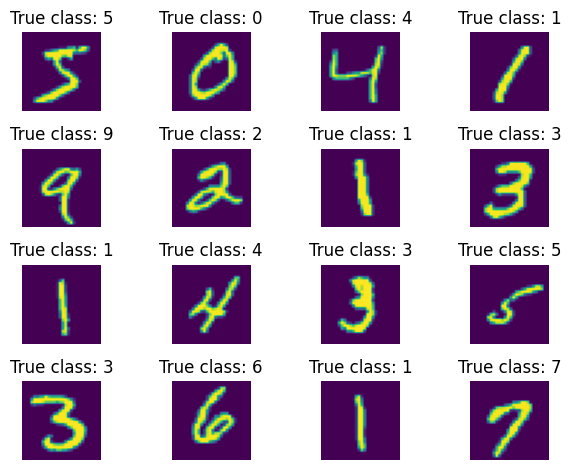

In [ ]:
# visualize some of the training data

fig, ax = plt.subplots(nrows=4, ncols=4)
ax = ax.flatten()

for i in range(ax.shape[0]):
    ax[i].axis("off")
    ax[i].imshow(x_train[i])
    ax[i].set_title(f"True class: {y_train[i]}")

fig.tight_layout()

In [ ]:
print(f"Number of images in train set: {x_train.shape[0]}")
print(f"Number of images in test set: {x_test.shape[0]}")

Number of images in train set: 60000
Number of images in test set: 10000


# Lets create validation set

In [ ]:
# ! overwriting x_train variable
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.15, random_state=2023)
# tu sme si este rozdelili trenovaci set na trenovaci a validacni :)

In [ ]:
print(f"Number of images in train set: {x_train.shape[0]}")
print(f"Number of images in valid set: {x_valid.shape[0]}")
print(f"Number of images in test set: {x_test.shape[0]}")

Number of images in train set: 51000
Number of images in valid set: 9000
Number of images in test set: 10000


# Lets create CNN model

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPool2D, GlobalAveragePooling2D, Dense, Softmax
from tensorflow.keras.models import Sequential # "sequence" of layers

In [ ]:
model = Sequential()

#Feature extractor
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(filters=8, kernel_size=3, strides=1, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(GlobalAveragePooling2D())

# Classifier
model.add(Dense(units=16,))
model.add(Activation('elu'))
model.add(Dense(units=10,))
model.add(Softmax())

# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 activation (Activation)     (None, 28, 28, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        1168      
                                                                 
 activation_1 (Activation)   (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        2320      
                                                        

# Compile model

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.metrics import Accuracy, SparseCategoricalAccuracy
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# define optimizer
#learning_rate = 1e-3
learning_rate = 0.01
optimizer = SGD(learning_rate=learning_rate)

In [ ]:
# define metrics
# Accuracy: y_pred needs to be in one-hot encoding
# SparseCategoricalAccuracy: y_pred needs to be in "class number" encoding (i.e., argmax)
accuracy = SparseCategoricalAccuracy(name="accuracy")

In [ ]:
# define loss
loss = SparseCategoricalCrossentropy(name="loss")

In [ ]:
# compile model
model.compile(optimizer=optimizer, metrics=[accuracy], loss=loss)

In [ ]:
# function to evaluate model
def evaluate_model(model, x_data, y_data, subset_name):

    print(f"-- {subset_name} -- ")

    metric_outputs = model.evaluate(x_data, y_data, batch_size=32, verbose=0)

    for i,k in enumerate(model.metrics):
        print(f"{k.name}: {metric_outputs[i]:.4f}")

In [ ]:
evaluate_model(model, x_train, y_train, "Train subset")
print()
evaluate_model(model, x_valid, y_valid, "Valid subset")
print()
evaluate_model(model, x_test, y_test, "Test subset")

-- Train subset -- 
loss: 2.3056
accuracy: 0.0607

-- Valid subset -- 
loss: 2.3061
accuracy: 0.0587

-- Test subset -- 
loss: 2.3058
accuracy: 0.0630


In [ ]:
# import os

# # Directory to save checkpoints
# checkpoint_path = "/content/drive/MyDrive/A_Projekt/my_cnn_mnist_next/"

# # Ensure directory exists
# if not os.path.exists(checkpoint_path):
#     os.makedirs(checkpoint_path)


# # Define ModelCheckpoint callback with the template path
# checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, save_best_only=True)

In [ ]:
# define training hyperparameters

BATCH_SIZE = 64
EPOCHS = 10

In [ ]:
#model.load_weights("/content/drive/MyDrive/A_Projekt")

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# fit the model and save training progress (history)

history = model.fit(x=x_train, y=y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_valid, y_valid))

Epoch 1/10
797/797 [==============================] - 7s 6ms/step - loss: 2.2904 - accuracy: 0.1696 - val_loss: 2.2631 - val_accuracy: 0.1926
Epoch 2/10
797/797 [==============================] - 4s 5ms/step - loss: 2.1610 - accuracy: 0.2195 - val_loss: 2.0215 - val_accuracy: 0.2690
Epoch 3/10
797/797 [==============================] - 4s 5ms/step - loss: 1.8576 - accuracy: 0.3309 - val_loss: 1.5998 - val_accuracy: 0.4154
Epoch 4/10
797/797 [==============================] - 4s 6ms/step - loss: 1.4117 - accuracy: 0.4903 - val_loss: 1.2088 - val_accuracy: 0.5758
Epoch 5/10
797/797 [==============================] - 4s 5ms/step - loss: 1.0761 - accuracy: 0.6338 - val_loss: 1.2472 - val_accuracy: 0.5603
Epoch 6/10
797/797 [==============================] - 4s 5ms/step - loss: 0.7986 - accuracy: 0.7406 - val_loss: 0.6181 - val_accuracy: 0.8112
Epoch 7/10
797/797 [==============================] - 5s 6ms/step - loss: 0.6285 - accuracy: 0.7983 - val_loss: 0.6334 - val_accuracy: 0.7799
Epoch 

In [ ]:
plt.plot(history.history['accuracy'], label="train")
plt.plot(history.history['val_accuracy'], label="valid")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()

In [ ]:
# visualize wrong predictions

train_predictions = model.predict(x_train, batch_size=128)

### train_predictions.shape is (51000, 10) -> 10 classes

# take argmax
train_predictions = train_predictions.argmax(axis=-1) # now we have shape of (51000,)

399/399 [==============================] - 1s 2ms/step


In [ ]:
# find indexes of wrongy and righty classified images

mask_wrong_ones = np.argwhere(train_predictions != y_train)[:,0]
mask_right_ones = np.argwhere(train_predictions == y_train)[:,0] #

In [ ]:
x_wrong_ones = x_train[mask_wrong_ones]
x_right_ones = x_train[mask_right_ones]

y_wrong_ones = y_train[mask_wrong_ones]
y_right_ones = y_train[mask_right_ones]

In [ ]:
# 44318 right predictions; 6682 wrong predictions

# describe_data("wrong_ones")
# describe_data("right_ones")

describe_data("x_wrong_ones")
describe_data("x_right_ones")
describe_data("y_wrong_ones")
describe_data("y_right_ones")
describe_data("x_test")
describe_data("y_test")

[x_wrong_ones] min: 0.0, max: 1.0, dtype: float32, shape: (4812, 28, 28, 1)
[x_right_ones] min: 0.0, max: 1.0, dtype: float32, shape: (46188, 28, 28, 1)
[y_wrong_ones] min: 0, max: 9, dtype: uint8, shape: (4812,)
[y_right_ones] min: 0, max: 9, dtype: uint8, shape: (46188,)
[x_test] min: 0.0, max: 1.0, dtype: float32, shape: (10000, 28, 28, 1)
[y_test] min: 0, max: 9, dtype: uint8, shape: (10000,)


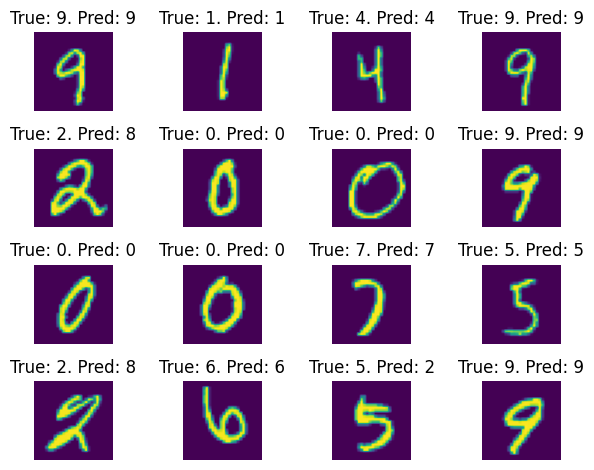

In [ ]:
# visualize some of the wrongy classified handwritten digits
import random
fig, ax = plt.subplots(nrows=4, ncols=4)
ax = ax.flatten()

for i in range(ax.shape[0]):

    a = random.randint(0,500)

    true_label = y_train[a]
    pred_label = train_predictions[a]

    ax[i].axis("off")
    ax[i].imshow(x_train[a])
    ax[i].set_title(f"True: {true_label}. Pred: {pred_label}")

fig.tight_layout()

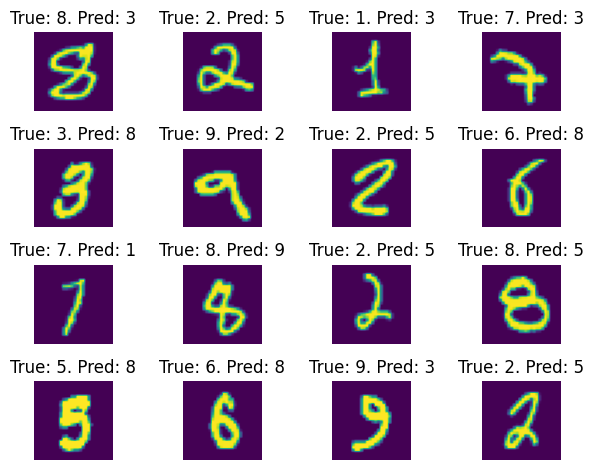

In [ ]:
# visualize some of the wrongy classified handwritten digits

fig, ax = plt.subplots(nrows=4, ncols=4)
ax = ax.flatten()

for i in range(ax.shape[0]):

    true_label = y_train[mask_wrong_ones][i]
    pred_label = train_predictions[mask_wrong_ones][i]

    ax[i].axis("off")
    ax[i].imshow(x_wrong_ones[i])
    ax[i].set_title(f"True: {true_label}. Pred: {pred_label}")

fig.tight_layout()

# Guided Backpropagation

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPool2D, GlobalAveragePooling2D, Dense, Softmax
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
a=

SyntaxError: invalid syntax (<ipython-input-37-3820896b1a8d>, line 1)

In [ ]:
# Function to create a guided backpropagation model
@tf.custom_gradient
def guidedRelu(x):
    def grad(dy):
        return tf.cast(dy > 0, tf.float32) * tf.cast(x > 0, tf.float32) * dy
    return tf.nn.relu(x), grad

class GuidedBackpropagationModel(tf.keras.Model):
    def __init__(self, original_model):
        super(GuidedBackpropagationModel, self).__init__()
        self.original_model = original_model

    def call(self, inputs, training=False):
        # Override the call method to compute guided backpropagation
        with tf.GradientTape() as tape:
            tape.watch(inputs)
            predictions = self.original_model(inputs)
            max_idx = tf.argmax(predictions, axis=-1)
            max_score = predictions[0, max_idx[0]]


        # Compute gradients
        gradients = tape.gradient(max_score, inputs)

        # Apply guided backpropagation rule: ReLU positive gradients, zero negative gradients

       #guided_gradients = guidedRelu(gradients)

        #return guided_gradients

        return gradients

In [ ]:
def visualize_guided_backpropagation_wrong_more(guided_backprop_model, images, labels, class_index):
    # Choose an image from the given class
    indices = np.where(labels == class_index)[0]
    fig, ax = plt.subplots(nrows=2, ncols=4)  # 2 rows, 4 columns
    ax = ax.flatten()

    for i in range(0,ax.shape[0],2):

        ax[i].axis("off")

        selected_index = np.random.choice(indices)
        image = images[selected_index:selected_index + 1]

        true_label = y_train[mask_wrong_ones][selected_index]
        pred_label = train_predictions[mask_wrong_ones][selected_index]

        # Compute guided backpropagation
        guided_gradients = guided_backprop_model(image)

        # Plot original image
        ax[i].imshow(image[0, :, :, 0], cmap="gray")
        ax[i].set_title(f'Original {true_label}')
        ax[i].axis("off")

        i += 1

        # Plot guided backpropagation
        ax[i].imshow(guided_gradients[0, :, :, :], cmap="gray")
        ax[i].set_title(f'GB {pred_label}')
        ax[i].axis("off")

    fig.tight_layout()
    plt.show()


In [ ]:
# Visualize guided backpropagation for specific classes
def visualize_guided_backpropagation_wrong(guided_backprop_model, images, labels, class_index):
    # Choose an image from the given class
    indices = np.where(labels == class_index)[0]
    selected_index = np.random.choice(indices)
    image = images[selected_index:selected_index + 1]

    true_label = y_train[mask_wrong_ones][selected_index]
    pred_label = train_predictions[mask_wrong_ones][selected_index]

    # Compute guided backpropagation
    guided_gradients = guided_backprop_model(image)

    # Plot original image
    plt.subplot(1, 2, 1)
    plt.imshow(image[0, :, :, 0],cmap = "gray")
    plt.title(f'Original Image - Class {class_index}')

    # Plot guided backpropagation
    plt.subplot(1, 2, 2)
    #plt.imshow(np.sum(guided_gradients[0, :, :, :], axis=-1),cmap = "gray")
    plt.imshow(guided_gradients[0, :, :, :],cmap = "gray")
    plt.title(f'Guided Backpropagation - Class {pred_label}')

    plt.show()


In [ ]:
def visualize_guided_backpropagation_more(guided_backprop_model, images, labels, class_index):
    # Choose an image from the given class
    indices = np.where(labels == class_index)[0]
    fig, ax = plt.subplots(nrows=2, ncols=4)  # 2 rows, 4 columns
    ax = ax.flatten()

    for i in range(0,ax.shape[0],2):

        ax[i].axis("off")

        selected_index = np.random.choice(indices)
        image = images[selected_index:selected_index + 1]

        # Compute guided backpropagation
        guided_gradients = guided_backprop_model(image)

        # Plot original image
        ax[i].imshow(image[0, :, :, 0], cmap="gray")
        ax[i].set_title(f'Original-C {class_index}')
        ax[i].axis("off")

        i += 1

        # Plot guided backpropagation
        ax[i].imshow(guided_gradients[0, :, :, :], cmap="gray")
        ax[i].set_title(f'GN-C {class_index}')
        ax[i].axis("off")

    fig.tight_layout()
    plt.show()


In [ ]:
# Visualize guided backpropagation for specific classes
def visualize_guided_backpropagation(guided_backprop_model, images, labels, class_index):
    # Choose an image from the given class
    indices = np.where(labels == class_index)[0]
    selected_index = np.random.choice(indices)
    image = images[selected_index:selected_index + 1]

    # Compute guided backpropagation
    guided_gradients = guided_backprop_model(image)

    # Plot original image
    plt.subplot(1, 2, 1)
    plt.imshow(image[0, :, :, 0],cmap = "gray")
    plt.title(f'Original Image - Class {class_index}')

    # Plot guided backpropagation
    plt.subplot(1, 2, 2)
    #plt.imshow(np.sum(guided_gradients[0, :, :, :], axis=-1),cmap = "gray")
    plt.imshow(guided_gradients[0, :, :, :],cmap = "gray")
    plt.title(f'Guided Backpropagation - Class {class_index}')

    plt.show()


In [ ]:
# def visualize_guided_backpropagation_wrong(guided_backprop_model, images, labels, class_index):
#     # Choose an image from the given class
#     indices = np.where(labels == class_index)[0]
#     selected_index = np.random.choice(indices)
#     image = images[selected_index:selected_index + 1]

#     true_label = y_train[mask_wrong_ones][i]
#     pred_label = train_predictions[mask_wrong_ones][selected_index]

#     # Compute guided backpropagation
#     guided_gradients = guided_backprop_model(image)

#     # Plot original image
#     plt.subplot(1, 2, 1)
#     plt.imshow(image[0, :, :, 0],cmap = "gray")
#     plt.title(f'Original Image - Class {class_index}')

#     # Plot guided backpropagation
#     plt.subplot(1, 2, 2)
#     #plt.imshow(np.sum(guided_gradients[0, :, :, :], axis=-1),cmap = "gray")
#     plt.imshow(guided_gradients[0, :, :, :],cmap = "gray")
#     plt.title(f'Guided Backpropagation - Class {pred_label}')

#     plt.show()



# # Visualize guided backpropagation for specific classes
# def visualize_guided_backpropagation_more(guided_backprop_model, images, labels, class_index):
#     # Choose an image from the given class
#     indices = np.where(labels == class_index)[0]
#     fig, ax = plt.subplots(nrows=2, ncols=2)
#     ax = ax.flatten()

#     for i in range(ax.shape[0]):
#       ax[i].axis("off")

#       selected_index = np.random.choice(indices)
#       image = images[selected_index:selected_index + 1]

#       # Compute guided backpropagation
#       guided_gradients = guided_backprop_model(image)

#       # Plot original image
#       plt.subplot(1, 2, 1)
#       plt.imshow(image[0, :, :, 0],cmap = "gray")
#       plt.title(f'Original Image - Class {class_index}')

#       # Plot guided backpropagation
#       plt.subplot(1, 2, 2)
#       #plt.imshow(np.sum(guided_gradients[0, :, :, :], axis=-1),cmap = "gray")
#       plt.imshow(guided_gradients[0, :, :, :],cmap = "gray")
#       plt.title(f'Guided Backpropagation - Class {class_index}')

#       plt.show()

#       ax[i].imshow(x_train[i])

#       #ax[i].set_title(f"True class: {y_train[i]}")

#     fig.tight_layout()

In [ ]:
layer_dict = [layer for layer in model.layers[1:] if hasattr(layer,'activation')]
for layer in layer_dict:
    if layer.activation == tf.keras.activations.relu:
        layer.activation = guidedRelu
        print("changed")



changed
changed
changed


In [ ]:
# Create an instance of the guided backpropagation model
guided_backprop_model = GuidedBackpropagationModel(model)

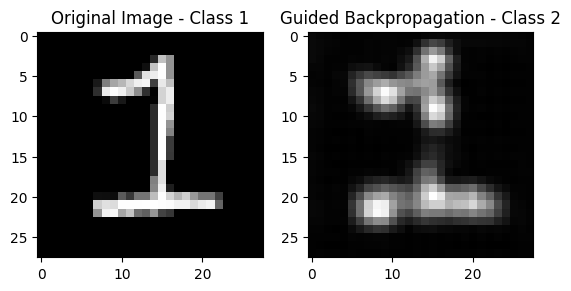

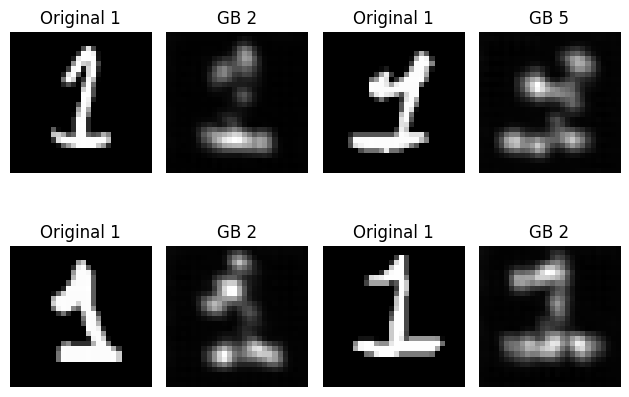

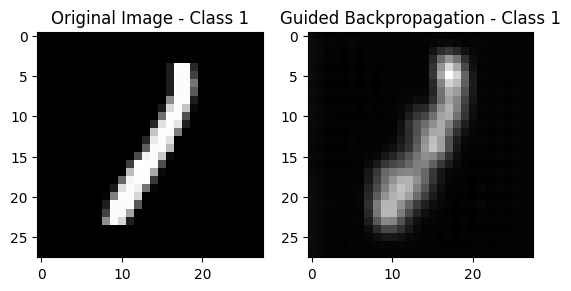

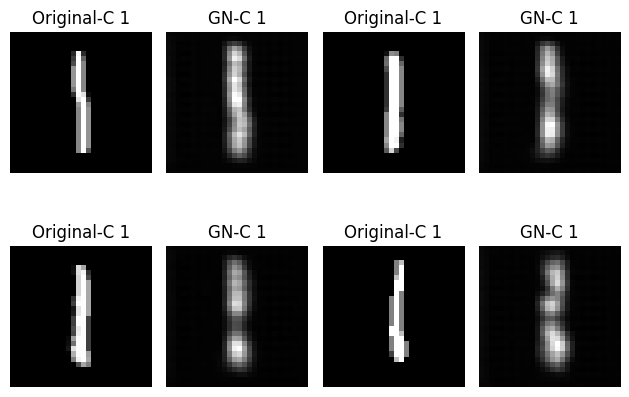

In [ ]:
# Example: Visualize guided backpropagation for class 7
visualize_guided_backpropagation_wrong(guided_backprop_model, x_wrong_ones, y_wrong_ones, class_index=1)
visualize_guided_backpropagation_wrong_more(guided_backprop_model, x_wrong_ones, y_wrong_ones, class_index=1)
visualize_guided_backpropagation(guided_backprop_model, x_right_ones, y_right_ones, class_index=1)
visualize_guided_backpropagation_more(guided_backprop_model, x_right_ones, y_right_ones, class_index=1)